In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [6]:
# Reading the data
train_df = pd.read_csv("inputHW_ExtraCredit.csv", names=['input', 'output'])

x_train = train_df['input'].values.reshape(-1,1)
x_train = pd.DataFrame(x_train)

y_train = train_df['output'].values.reshape(-1,1)
y_train = pd.DataFrame(y_train)

train_df.head()

,input,output
0,0.318328,0.750789
1,0.344461,-0.648483
2,0.357117,1.122161
3,0.461714,-0.024687
4,0.971318,2.558952


In [7]:
x_train.head()

,0
0,0.318328
1,0.344461
2,0.357117
3,0.461714
4,0.971318


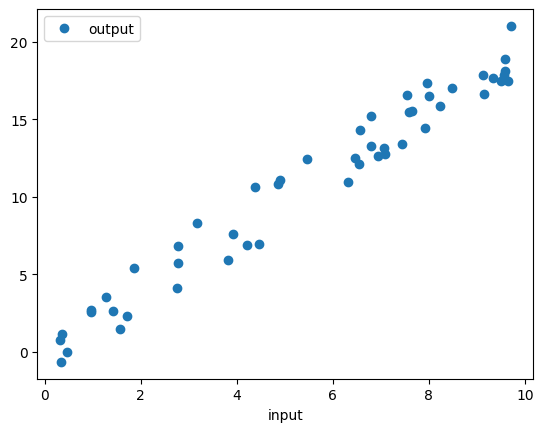

In [8]:
train_df.plot(x='input', y='output', style='o')
plt.show()

In [9]:
# Feature Scaling
def scale_datasets(x_train):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    return x_train_scaled

x_train_scaled = scale_datasets(x_train)

# Neural nets: 1 hidden layer with 2 neurons and 1 output layer
hidden_units = 2
learning_rate = 0.01

def nn_model():
    model = Sequential([
        Dense(hidden_units, kernel_initializer='normal', activation='linear'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

model = nn_model()

In [10]:
# evaluation parameter - mean square log of error
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

In [11]:
#training
t = model.fit(x_train_scaled.values, y_train.values, epochs=150, batch_size=10,validation_split=0.2)

Epoch 1/150
4/4 [==============================] - 1s 55ms/step - loss: 4.8666 - mean_squared_logarithmic_error: 4.8666 - val_loss: 8.3871 - val_mean_squared_logarithmic_error: 8.3871
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 4.6929 - mean_squared_logarithmic_error: 4.6929 - val_loss: 8.1235 - val_mean_squared_logarithmic_error: 8.1235
Epoch 3/150
4/4 [==============================] - 0s 12ms/step - loss: 4.5097 - mean_squared_logarithmic_error: 4.5097 - val_loss: 7.8408 - val_mean_squared_logarithmic_error: 7.8408
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 4.3180 - mean_squared_logarithmic_error: 4.3180 - val_loss: 7.5396 - val_mean_squared_logarithmic_error: 7.5396
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 4.1280 - mean_squared_logarithmic_error: 4.1280 - val_loss: 7.2066 - val_mean_squared_logarithmic_error: 7.2066
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 3.9115 - 

In [12]:
#Weights are updating at each epoch based on the loss calculation = Backpropagation
#prediction
standard_scaler = StandardScaler()
test_data = train_df['input'].values.reshape(-1,1)
test_data = pd.DataFrame(test_data)
y_pred = pd.DataFrame(standard_scaler.fit_transform(test_data), columns=test_data.columns)

train_df['prediction'] = model.predict(y_pred)

2/2 [==============================] - 0s 2ms/step


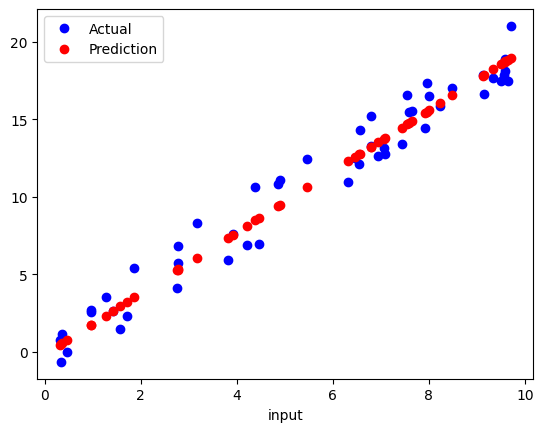

In [14]:
ax = train_df.plot(x='input',y='output',  style='o', label='Actual',c='b')
train_df.plot(x='input',y='prediction', style='o', label='Prediction', c='r', ax=ax)
plt.show()

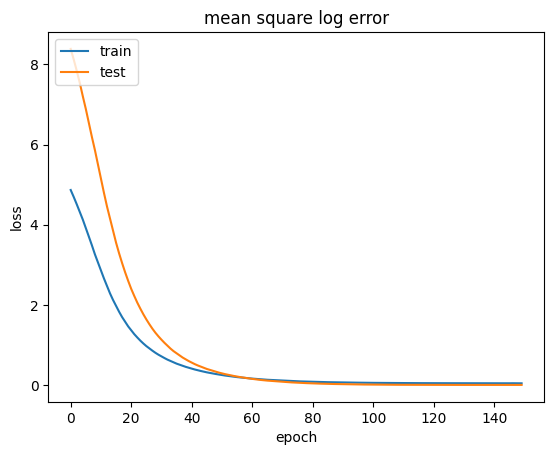

In [21]:
#loss 
plt.plot(t.history['loss'])
plt.plot(t.history['val_loss'])
plt.title('mean square log error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# What do you think should be done to make prediction more accurate?


# Increase hidden layers and the neurons in them. This will make the model much more accuracte
# Use dropouts — Randomly dropping connections between neurons, forcing the network to find new paths and generalise.
# Use batch normalization — Normalizing the inputs to each layer, so that they have a mean of 0 and a standard deviation of 1.
